In [191]:
#%matploplib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Fuente de informacion repositorio ANID proyectos postulados 2016 a 2020
Macrozona Norte

In [192]:
urlAdjudicados = 'https://raw.githubusercontent.com/ANID-GITHUB/Historico-de-Proyectos-Adjudicados/master/BDH_Proyectos.csv'
urlPostulados = 'https://raw.githubusercontent.com/ANID-GITHUB/Postulaciones/main/POSTULACIONES_2016_2020.csv'

dfAdjudicados = pd.read_csv(urlAdjudicados,sep=';',header=0,encoding = 'UTF-8',warn_bad_lines=False, error_bad_lines = False,lineterminator='\n') # encoding = "ISO-8859-1"
dfPostulados = pd.read_csv(urlPostulados,sep=';',header=0,encoding = 'UTF-8',warn_bad_lines=False, error_bad_lines = False,lineterminator='\n')

C:\Users\Asesor 2\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Asesor 2\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Cambio de nombre de columnas

In [193]:

dfAdjudicados = dfAdjudicados.rename(columns={'MACROZONA MINCIENCIA (segUn ax)':'MACROZONA','MONTO ADJUDICADO (MILES $)':'MONTO_ADJUDICADO'})

print('****************** ADJUDICADOS ******************')
print(dfAdjudicados.columns.tolist())

print('****************** POSTULADOS ******************')
print(dfPostulados.columns.tolist())

****************** ADJUDICADOS ******************
['CODIGO_PROYECTO', 'N', 'SUBDIRECCION', 'PROGRAMA_CONICYT', 'INSTRUMENTO', 'NOMBRE_CONCURSO', 'AÑO_CONCURSO', 'AÑO_FALLO', 'NOMBRE_PROYECTO', 'AREA_OCDE', 'DISCIPLINA_DETALLE', 'GRUPO_DE_EVALUACION', 'DURACION_MESES', 'TIPO_BENEFICIARIO', 'NOMBRE_RESPONSABLE', 'SEXO', 'INSTITUCION_PRINCIPAL', 'MACROZONA', 'REGION_EJECUCION', 'MONTO_ADJUDICADO', 'M$_SINFO_NOSOLICITA\r']
****************** POSTULADOS ******************
['CODIGO DEL PROYECTO', 'SUBDIRECCION', 'PROGRAMA', 'INSTRUMENTO', 'NOMBRE DEL CONCURSO', ' MONTO TOTAL ADJUDICADO (M$) ', 'ESTADO_RESOLUCION_CONCURSO', 'DISCIPLINA OECD', 'REGION DE EJECUCION', 'TIPO DE BENEFICIARIO', 'TIPO DE INSTITUCION', 'SEXO', 'AÑO DE FALLO', 'MACRO ZONA\r']


Construccion de dataframe por macrozona

In [194]:
dfNorte = dfAdjudicados[['MACROZONA','REGION_EJECUCION','AÑO_CONCURSO','INSTITUCION_PRINCIPAL','TIPO_BENEFICIARIO','INSTRUMENTO','PROGRAMA_CONICYT','SEXO','MONTO_ADJUDICADO']]
dfNorte = dfNorte.sort_values(by=['REGION_EJECUCION','AÑO_CONCURSO'])

dfNorte.to_excel('../output/proyectos_anid_adjudicados_MZN.xlsx')

Filtros para dataframe

In [195]:
AÑO = 2010

dfNorte = dfNorte[dfNorte.MACROZONA == "NORTE"]
dfNorte = dfNorte[dfNorte.PROGRAMA_CONICYT == "FONDEQUIP"]
dfNorte = dfNorte[dfNorte.AÑO_CONCURSO >= AÑO]

Adjudicaciones por región '01. TARAPACA' '02. ANTOFAGASTA' '03. ATACAMA' '15. ARICA Y PARINACOTA'

                               AÑO_CONCURSO
REGION_EJECUCION AÑO_CONCURSO              
01. TARAPACA     2018                     1
                 2019                     1
                 2020                     1
02. ANTOFAGASTA  2012                     2
                 2013                     2
                 2014                     2
                 2015                     1
                 2016                     4
                 2018                     1
                 2020                     2
03. ATACAMA      2013                     2
                 2015                     2
                 2016                     2
                 2017                     1


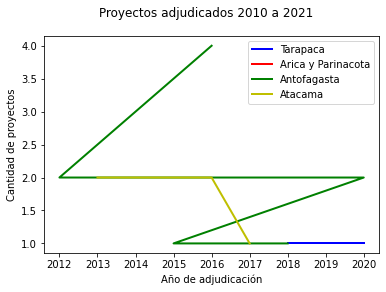

In [196]:
dfResult = dfNorte[['AÑO_CONCURSO']].groupby([dfNorte.REGION_EJECUCION,dfNorte.AÑO_CONCURSO], dropna=False).count()

print (dfResult)

plt.plot(dfNorte[dfNorte.REGION_EJECUCION == '01. TARAPACA'].AÑO_CONCURSO.value_counts(),linewidth=2.0,color='b',label = 'Tarapaca')
plt.plot(dfNorte[dfNorte.REGION_EJECUCION == '15. ARICA Y PARINACOTA'].AÑO_CONCURSO.value_counts(),linewidth=2.0,color='r',label = 'Arica y Parinacota')
plt.plot(dfNorte[dfNorte.REGION_EJECUCION == '02. ANTOFAGASTA'].AÑO_CONCURSO.value_counts(),linewidth=2.0,color='g',label = 'Antofagasta')
plt.plot(dfNorte[dfNorte.REGION_EJECUCION == '03. ATACAMA'].AÑO_CONCURSO.value_counts(),linewidth=2.0,color='y',label = 'Atacama')

plt.suptitle('Proyectos adjudicados 2010 a 2021')
plt.ylabel('Cantidad de proyectos')
plt.xlabel('Año de adjudicación')
plt.legend()
plt.show()


In [197]:
dfResult = dfNorte[['AÑO_CONCURSO']].groupby([dfNorte.INSTITUCION_PRINCIPAL,dfNorte.AÑO_CONCURSO], dropna=False).count()

print (dfResult)




                                                       AÑO_CONCURSO
INSTITUCION_PRINCIPAL                    AÑO_CONCURSO              
INSTITUTO MILENIO DE OCEANOGRAFIA        2020                     1
PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE 2013                     1
UNIVERSIDAD ARTURO PRAT                  2018                     1
                                         2019                     1
UNIVERSIDAD CATOLICA DEL NORTE           2013                     1
                                         2014                     1
                                         2016                     2
                                         2020                     1
UNIVERSIDAD DE ANTOFAGASTA               2012                     2
                                         2013                     1
                                         2014                     1
                                         2015                     1
                                         2016   